In [1]:
# Pandas
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.style as style
%matplotlib inline
from sqlalchemy import create_engine

In [2]:
# import Postgres address, port, username, password, and database name from config file
from config import POSTGRES_ADDRESS, POSTGRES_PORT, POSTGRES_USERNAME, POSTGRES_PASSWORD, POSTGRES_DBNAME

# A long string that contains the necessary Postgres login information 
postgres_str = ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME)) 

# Create the connection
cnx = create_engine(postgres_str)

In [3]:
departments_df = pd.read_sql_query('''SELECT * FROM departments;''', cnx)
departments_df.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [4]:
dept_emp_df = pd.read_sql_query('''SELECT * FROM dept_emp;''', cnx)
dept_emp_df.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [5]:
dept_manager_df = pd.read_sql_query('''SELECT * FROM dept_manager;''', cnx)
dept_manager_df.head()

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21


In [6]:
employees_df = pd.read_sql_query('''SELECT * FROM employees;''', cnx)
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [7]:
salaries_df = pd.read_sql_query('''SELECT * FROM salaries;''', cnx)
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [8]:
titles_df = pd.read_sql_query('''SELECT * FROM titles;''', cnx)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [9]:
# 2. Create a bar chart of average salary by title.
titles_avg_salary_df = pd.read_sql_query('''SELECT title, ROUND(AVG(salary), 2) AS "Average Salary"
FROM titles AS t
INNER JOIN salaries AS s 
ON (t.emp_no = s.emp_no)
GROUP BY title
ORDER BY "Average Salary" DESC;''', cnx)
titles_avg_salary_df.head()


,title,Average Salary
0,Senior Staff,58503.29
1,Staff,58465.27
2,Manager,51531.04
3,Technique Leader,48580.51
4,Engineer,48539.78


In [10]:
# Set index to title
titles_avg_salary_df_setindex = titles_avg_salary_df.set_index('title')
titles_avg_salary_df_setindex.head()

,Average Salary
title,
Senior Staff,58503.29
Staff,58465.27
Manager,51531.04
Technique Leader,48580.51
Engineer,48539.78


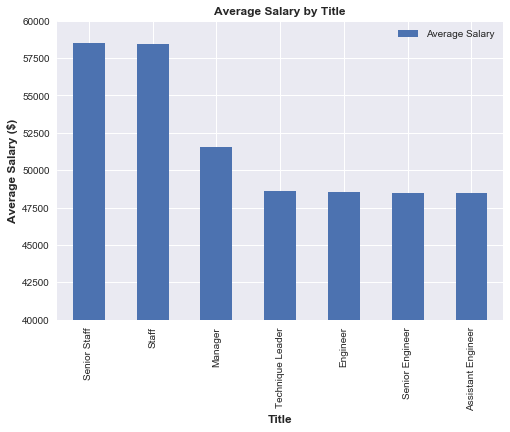

In [11]:
# Make bar graph
style.use('seaborn-poster') 
style.use('seaborn')
titles_avg_salary_df_setindex.plot(kind='bar')
x_labels = titles_avg_salary_df_setindex.index
plt.xticks(np.arange(len(x_labels)), x_labels)
plt.xticks(rotation = 90)
plt.ylim(40000, 60000)
plt.xlabel('Title', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Average Salary ($)', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.title('Average Salary by Title', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.savefig("average_salary_by_title" + '.png', bbox_inches='tight')